Mono waveform analysis

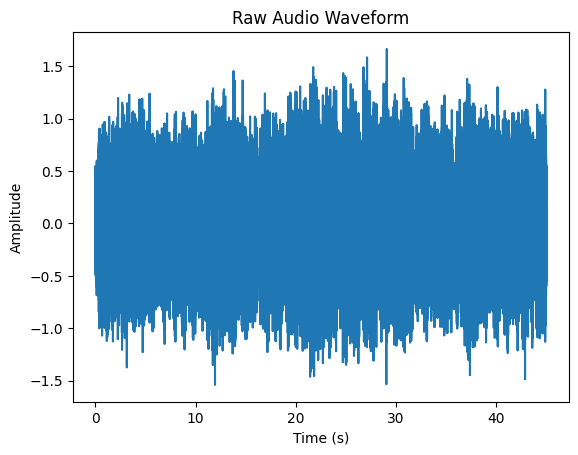

In [8]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#note: this data was captured from the left channel only
os.chdir('../data')  # Change to the directory where the data file is located
t = np.linspace(0, 45, 2000000-1)
df = pd.read_csv('recordLong.csv').to_numpy()
plt.plot(t,df)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude') #not entirely sure what the units are here; need to check waveform sdk documentation
plt.title('Raw Audio Waveform');

converting the raw voltages into 16 bit wav format

In [ ]:
import scipy.io.wavfile as wav
# Normalize 
v = df
v_norm = v / np.max(np.abs(v))

# Clip to [-1, 1]
v_norm = np.clip(v_norm, -1.0, 1.0) #--> wonder how much this will distrort the signal??

# Convert to 16-bit PCM
v_int16 = np.int16(v_norm * 32767)

# Save to WAV
wav.write("recordLong2.wav", 44100, v_int16)
